# Seminar 15
# Conjugate gradient method

## Reminder

1. Newton method
2. Convergence theorem
4. Comparison with gradient descent
5. Quasi-Newton methods

## Linear system vs. unconstrained minimization problem
Consider the problem

$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$

where $A \in \mathbb{S}^n_{++}$.
From the necessary optimality condition follows

$$
Ax^* = b
$$

Also denote gradient $f'(x_k) = Ax_k - b$ by $r_k$

## How to solve linear system $Ax = b$?

- Direct methods are based on the matrix decompositions:
    - Dense matrix $A$: dimension is less then some thousands
    - Sparse matrix $A$: dimension of the order $10^4 - 10^5$
- Iterative methods: the method of choice in many cases, the single approach which is appropriate for system with dimension $ > 10^6$

## Some history...

M. Hestenes and E. Stiefel proposed *conjugate gradient method* (CG) 

to solve linear system in 1952 as **direct** method. 

Many years CG was considered only as theoretical interest, because

- CG does not work with slide rule
- CG has not a lot advantages over Gaussian elimination while working with calculator

CG method has to be considered as **iterative method**, i.e. stop after 

achieve required tolerance!

More details see [here](https://www.siam.org/meetings/la09/talks/oleary.pdf)

## Conjugate directions method

- Descent direction in gradient descent method is anti-gradient
- Convergence is veryyy **slow** for convex functions with pooorly conditioned hessian

**Idea:** move along directions that guarantee converegence in $n$ steps.

**Definition.** Nonzero vectors $\{p_0, \ldots, p_l\}$ are called *conjugate* with tespect to matrix $A \in \mathbb{S}^n_{++}$, where 

$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

**Claim.** For every initial guess vector $x_0 \in \mathbb{R}^n$ the sequence $\{x_k\}$, which is generated by conjugate gradient method, converges to solution of linear system $Ax = b$ not more than after $n$ steps.

```python
def ConjugateDirections(x0, A, b, p):
    
    x = x0
    
    r = A.dot(x) - b
    
    for i in range(len(p)):
        
        alpha = - (r.dot(p[i])) / (p[i].dot(A.dot(p[i])))
        
        x = x + alpha * p[i]
        
        r = A.dot(x) - b
        
    return x

```

### Example of conjugate directions

- Eigenvectors of matrix $A$
- For every set of $n$ vectors one can perform analogue of Gram-Scmidt orthogonalization and get conjugate dorections

**Q:** What is Gram-Schmidt orthogonalization process? :)

### Geometrical interpretation (Mathematics Stack Exchange)

<center><img src="./cg.png" ></center>

## Conjugate gradient method

**Idea:** new direction $p_k$  is searched in the form $p_k = -r_k + \beta_k p_{k-1}$, where $\beta_k$ is based on the requirement of conjugacy of directions $p_k$ and $p_{k-1}$:

$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap^{\top}_{k-1}}
$$

Thus, to get the next conjugate direction $p_k$ it is necessary to store conjugate direction $p_{k-1}$ and residual $r_k$ from the previous iteration. 

**Q:** how to select step size $\alpha_k$?

### Convergence theorems

**Theorem 1.** If matrix $A \in \mathbb{S}^n_{++}$ has only $r$ distinct eigenvalues, then conjugate gradient method converges in $r$ iterations.

**Theorem 2.** The following convergence estimate holds

$$
\| x_{k+1} - x^* \|_A \leq \left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$

where $\|x\|_A = x^{\top}Ax$ and $\kappa(A) = \frac{\lambda_n(A)}{\lambda_1(A)}$ - condition number of matrix $A$

**Remark:** compare coefficient of the linear convergence with 

corresponding coefficiet in gradient descent method.

### Interpretations of conjugate gradient method

- Gradient descent in the space $y = Sx$, where $S = [p_0, \ldots, p_n]$, in which the matrix $A$ is digonal (or identity if the conjugate directions are orthonormal)
- Search optimal solution in the [Krylov subspace](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}(A) = \{b, Ab, A^2b, \ldots \}$

### Improved version of CG method

In practice the following equations for step size $\alpha_k$ and coefficient $\beta_{k}$ are used.

$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$

**Q:** why do they better than base version?

### Pseudocode of CG method
```python
def ConjugateGradientQuadratic(x0, A, b):
    
    r = A.dot(x0) - b
    
    p = -r
    
    while np.linalg.norm(r) != 0:
        
        alpha = r.dot(r) / p.dot(A.dot(p))
        
        x = x + alpha * p
        
        r_next = r + alpha * A.dot(p)
        
        beta = r_next.dot(r_next) / r.dot(r)
        
        p = -r_next + beta * p
        
        r = r_next
        
    return x

```

## Using CG method in Newton method

- To find descent direction in Newton method one has to solve the following linear system $H(x_k) h_k = -f'(x_k)$ 
- If the objective function is strongly convex, then $H(x_k) \in \mathbb{S}^n_{++}$ and to solve this linear system one can use CG. In this case the merhod is called *inexact Newton method*.
- What's new?
    - Explicit storage of hessian is not needed, it's enough to have function that perform multiplication hessian by vector
    - One can control accuracy of solving linear system and do not solve it very accurate far away from minimizer. **Important**: inexact solution may be not descent direction! 
    - Convergence is only suprlinear if backtracking starts with $\alpha_0 = 1$ similarly to Newton method

## CG method for non-quadratic function

**Idea:** use gradients instead of residuals $r_k$ and backtracking for search $\alpha_k$ instead of analytical expression. We get Fletcher-Reeves method.

```python
def ConjugateGradientFR(f, gradf, x0):
    
    x = x0
    
    grad = gradf(x)
    
    p = -grad
    
    while np.linalg.norm(gradf(x)) != 0:
        
        alpha = StepSearch(x, f, gradf, **kwargs)
        
        x = x + alpha * p
        
        grad_next = gradf(x)
        
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        
        p = -grad_next + beta * p
        
        grad = grad_next
        
        if restart_condition:
            
            p = -gradf(x)
            
    return x

```

### Convergence theorem

**Theorem.** Assume 
- level set $\mathcal{L}$ is bounded
- there exists $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ for $x \in \mathcal{L}$
Then

$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

### Restarts

1. To speed up convergence of CG one can use *restart* technique: remove stored history, consider current point as $x_0$ and run method from this point
2. There exist different conditions which indicate the necessity of restart, i.e.
    - $k = n$
    - $\dfrac{|\langle f'(x_k), f'(x_{k-1}) \rangle |}{\| f'(x_k) \|_2^2} \geq \nu \approx 0.1$
3. It can be shown (see Nocedal, Wright Numerical Optimization, Ch. 5, p. 125), that Fletcher-Reeves method without restarts can converge veryyy slow! 
4. Polak-Ribiere method and its modifications have not this drawback

### Remarks
- The great notes "An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" is available [here](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
- Besides Fletcher-Reeves method there exist other ways to compute $\beta_k$: Polak-Ribiere method, Hestens-Stiefel method...
- The CG method requires to store 4 vectors, what vectors?
- The bottleneck is matrix by vector multiplication

## Experiments

### Quadratic objective function 

In [1]:
import numpy as np
n = 100
# Random
# A = np.random.randn(n, n)
# A = A.T.dot(A)
# Clustered eigenvalues
A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)
# Hilbert matrix
# A = np.array([[1.0 / (i+j - 1) for i in xrange(1, n+1)] for j in xrange(1, n+1)])
# b = np.ones(n)

f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

A is normal matrix: ||AA* - A*A|| = 0.0


#### Eigenvalues distribution 

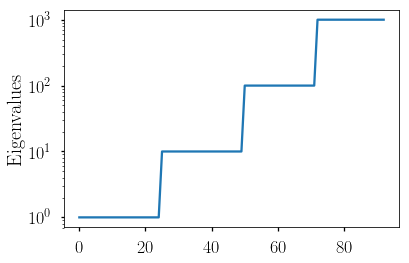

In [2]:
USE_COLAB = False

%matplotlib inline
import matplotlib.pyplot as plt

if not USE_COLAB:
    plt.rc("text", usetex=True)
    plt.rc("font", family='serif')
    
if USE_COLAB:
    !pip install git+https://github.com/amkatrutsa/liboptpy
        
import seaborn as sns
sns.set_context("talk")

eigs = np.linalg.eigvalsh(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Exact solution

In [3]:
import scipy.optimize as scopt

def callback(x, array):
    array.append(x)

In [4]:
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback)
x = x.x
print("||f'(x*)|| =", np.linalg.norm(A.dot(x) - b))
print("f* =", f(x))

||f'(x*)|| = 1.0369185281750917e-05
f* = -11.862243075233534


#### Implementation of conjugate gradient method

In [5]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [6]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

print("\t CG quadratic")
cg_quad = methods.fo.ConjugateGradientQuad(A, b)
x_cg = cg_quad.solve(x0, tol=1e-7, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.ExactLineSearch4Quad(A, b))
x_gd = gd.solve(x0, tol=1e-7, disp=True)

print("Condition number of A =", abs(max(eigs)) / abs(min(eigs)))

	 CG quadratic
Convergence in 4 iterations
Function value = -11.862243075235172
Norm of gradient = 3.8187218127914515e-09
	 Gradient Descent
Convergence in 100 iterations
Function value = -5.587954614458977
Norm of gradient = 4.080288108928145
Condition number of A = 1000.0000000003688


#### Convergence plot

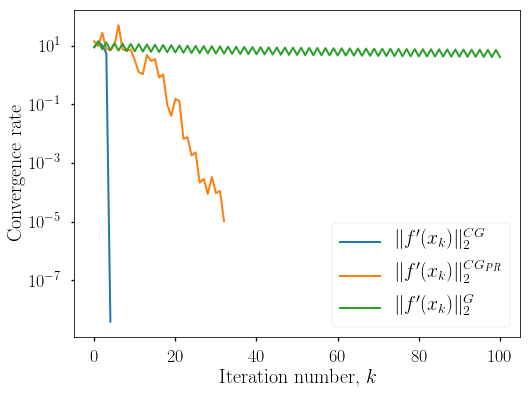

In [7]:
plt.figure(figsize=(8,6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array[:50]], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [8]:
print([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()])

[8.845930974954362, 14.015059201881973, 10.16744487372933, 5.610074694671215, 3.8187218127914515e-09]


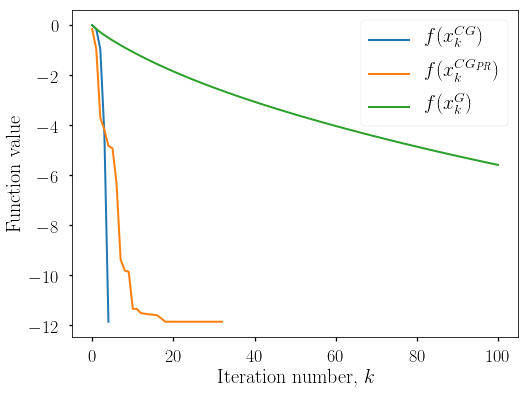

In [9]:
plt.figure(figsize=(8,6))
plt.plot([f(x) for x in cg_quad.get_convergence()], label=r"$f(x^{CG}_k)$", linewidth=2)
plt.plot([f(x) for x in scopt_cg_array], label=r"$f(x^{CG_{PR}}_k)$", linewidth=2)
plt.plot([f(x) for x in gd.get_convergence()], label=r"$f(x^{G}_k)$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Function value", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

### Non-quadratic function

In [10]:
import numpy as np
import sklearn.datasets as skldata
import scipy.special as scspec

n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1
def f(w):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]
# f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
# grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 1.9334391059533118


#### Implementation of Fletcher-Reeves method

In [11]:
def ConjugateGradientFR(f, gradf, x0, num_iter=100, tol=1e-8, callback=None, restart=False):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = utils.backtracking(x, p, method="Wolfe", beta1=0.1, beta2=0.4, rho=0.5, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = gradf(x)
            p = -grad
    return x

#### Convergence plot

In [12]:
import scipy.optimize as scopt
import liboptpy.restarts as restarts

n_restart = 60
tol = 1e-5
max_iter = 600

scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=grad_f, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x
print("\t CG by Polak-Rebiere")
print("Norm of garient = {}".format(np.linalg.norm(grad_f(x))))
print("Function value = {}".format(f(x)))

print("\t CG by Fletcher-Reeves")
cg_fr = methods.fo.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.4, init_alpha=1.))
x = cg_fr.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t CG by Fletcher-Reeves with restart n")
cg_fr_rest = methods.fo.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.4, 
                                         init_alpha=1.), restarts.Restart(n // n_restart))
x = cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.4, init_alpha=1.))
x = gd.solve(x0, max_iter=max_iter, tol=tol, disp=True)

	 CG by Polak-Rebiere
Norm of garient = 1.4300709199609023e-05
Function value = 0.49027579401250215
	 CG by Fletcher-Reeves
Convergence in 114 iterations
Function value = 0.4902757939862087
Norm of gradient = 8.247750869146107e-06
	 CG by Fletcher-Reeves with restart n
Convergence in 82 iterations
Function value = 0.4902757939880006
Norm of gradient = 7.016046988177081e-06
	 Gradient Descent
Convergence in 361 iterations
Function value = 0.49027579399156757
Norm of gradient = 9.535301105947104e-06


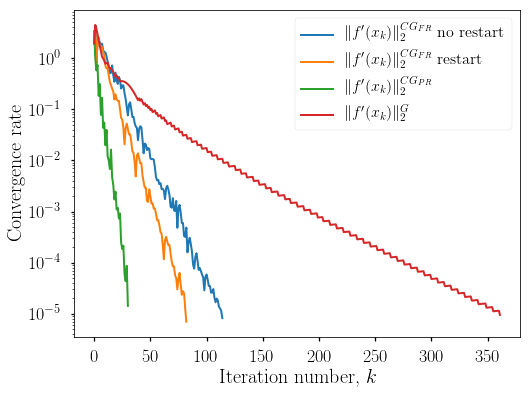

In [13]:
plt.figure(figsize=(8, 6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr.get_convergence()], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ no restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr_rest.get_convergence()], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Running time

In [14]:
%timeit scopt.minimize(f, x0, method="CG", tol=tol, jac=grad_f, options={"maxiter": max_iter})
%timeit cg_fr.solve(x0, tol=tol, max_iter=max_iter)
%timeit cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter)
%timeit gd.solve(x0, tol=tol, max_iter=max_iter)

11 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
620 ms ± 5.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
533 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.73 s ± 8.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Recap

1. Conjugate directions
2. Conjugate gradient method
3. Convergence
4. Experiments